Copyright 2024 The Zimtohrli Authors. All Rights Reserved.

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

     http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.

In [77]:
#@title Import libraries

import numpy as np
import jax.numpy as jnp
import scipy
import matplotlib.pyplot as plt
import functools

In [78]:
# @title Define the ISO 226 table of constants per frequency range

ISO_226_constant_table = np.array(
    [
        [20, 0.532, -31.6, 78.5],
        [25, 0.506, -27.2, 68.7],
        [31.5, 0.480, -23.0, 59.5],
        [40, 0.455, -19.1, 51.1],
        [50, 0.432, -15.9, 44.0],
        [63, 0.409, -13.0, 37.5],
        [80, 0.387, -10.3, 31.5],
        [100, 0.367, -8.1, 26.5],
        [125, 0.349, -6.2, 22.1],
        [160, 0.330, -4.5, 17.9],
        [200, 0.315, -3.1, 14.4],
        [250, 0.301, -2.0, 11.4],
        [315, 0.288, -1.1, 8.6],
        [400, 0.276, -0.4, 6.2],
        [500, 0.267, 0.0, 4.4],
        [630, 0.259, 0.3, 3.0],
        [800, 0.253, 0.5, 2.2],
        [1000, 0.250, 0.0, 2.4],
        [1250, 0.246, -2.7, 3.5],
        [1600, 0.244, -4.1, 1.7],
        [2000, 0.243, -1.0, -1.3],
        [2500, 0.243, 1.7, -4.2],
        [3150, 0.243, 2.5, -6.0],
        [4000, 0.242, 1.2, -5.4],
        [5000, 0.242, -2.1, -1.5],
        [6300, 0.245, -7.1, 6.0],
        [8000, 0.254, -11.2, 12.6],
        [10000, 0.271, -10.7, 13.9],
        [12500, 0.301, -3.1, 12.3],
        [15000, 0.33, -17, 0.12],  # Extrapolated to make a plausible curve
        [17500, 0.38, -30, 0.12],  # Extrapolated to make a plausible curve
    ],
    dtype=np.float64,
)

res.x=array([ 3.11532065e-01,  9.32095388e-02,  1.08209412e+00,  5.77937944e+00,
        2.64150171e+02,  5.53404309e-04,  1.60466072e+01,  7.44334648e+02,
        3.32260236e-01, -2.41731523e+00])


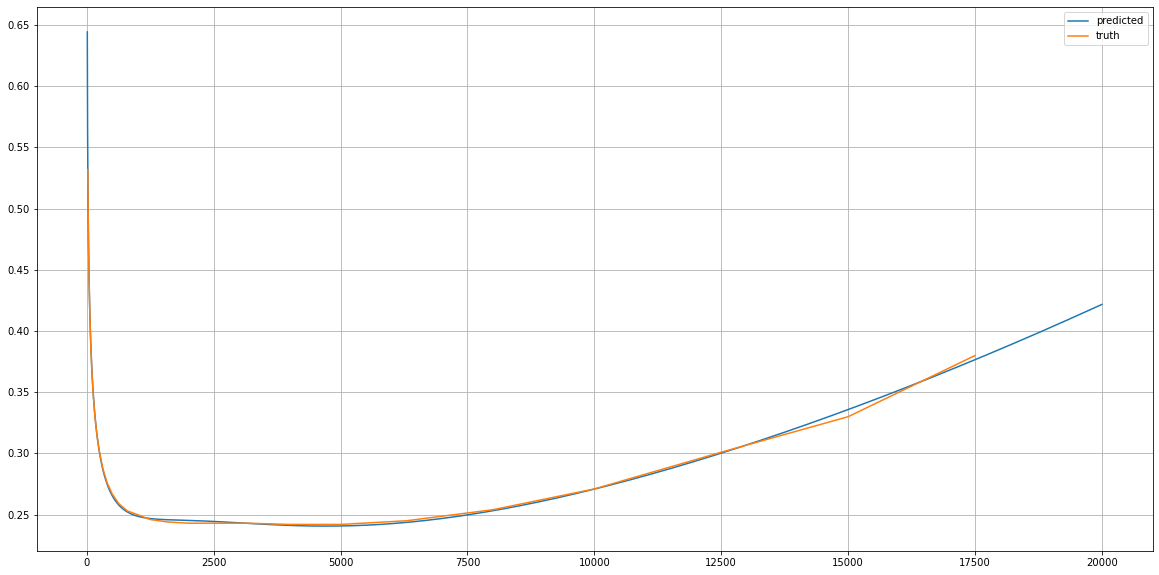

res.x=array([ 1.04895312e+04,  1.16834373e+01,  4.63216422e+02,  1.07277873e+01,
        9.33873976e-01,  5.79566363e-01,  1.06503907e+00,  1.93853475e+04,
        4.63762437e-02, -4.36163544e+00,  1.50737510e+00,  7.94185866e-01,
        8.70352919e-01,  2.12991220e+03, -2.62054739e-03,  2.63009217e-01])


<ipython-input-79-241b9a1a6b29>:26: RuntimeWarning: invalid value encountered in log
  return params[0] + params[1] * np.log(params[2] * (x - params[3])) - 5*params[4]* np.exp(-0.00001*params[5]*(x-1500*params[6])**2) + 5*params[7]* np.exp(-0.000001*params[8]*(x-3000*params[9])**2) - 15*params[10]*np.exp(-0.0000001*params[11]*(x-9000*params[12])**2) - 5*params[13]*np.exp(-0.00000001*params[14]*(x-12500*params[15])**2)


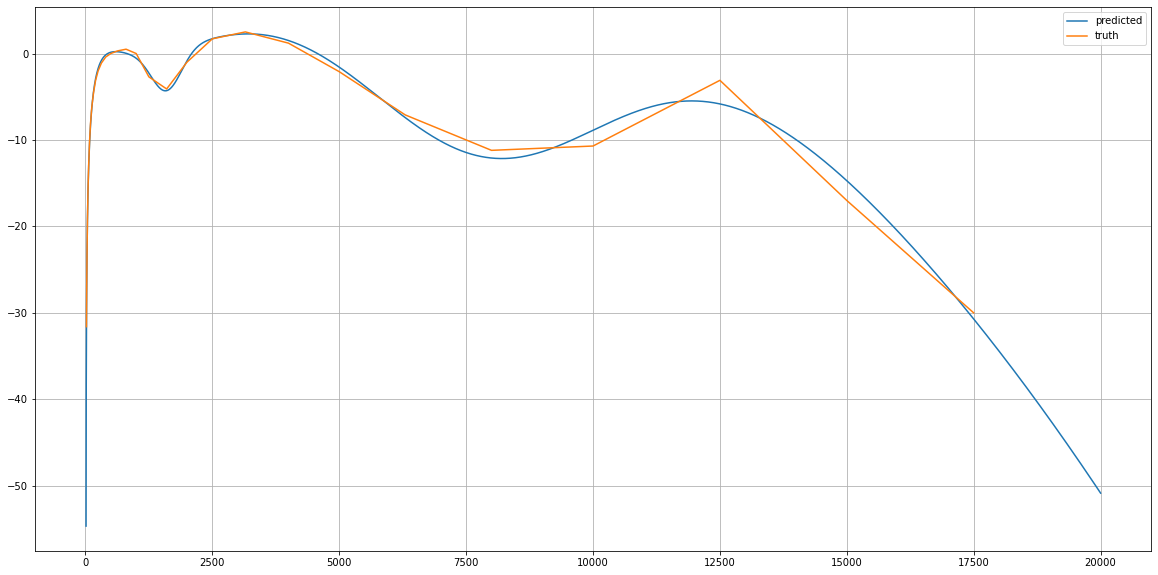

res.x=array([-1.92510181e+02, -2.20827757e+01,  9.19748235e+01,  1.26594322e+01,
        6.97360326e+00,  2.99022584e-02,  9.50394539e-01, -3.71694403e+01,
        4.20769098e-02,  1.86764149e+00,  1.97954462e-07, -8.75703210e-03,
       -3.64426652e+01])


<ipython-input-79-241b9a1a6b29>:32: RuntimeWarning: invalid value encountered in log
  return params[0] + params[1] * np.log(params[2] * (x - params[3])) + 5*params[4] * np.exp(-0.00001*params[5]*(x-1200*params[6])**2) - 10*params[7]*np.exp(-0.0000001*params[8]*(x-3300*params[9])**2) + 20*params[10]*np.exp(-0.00000001*params[11]*(x-12000*params[12])**2)


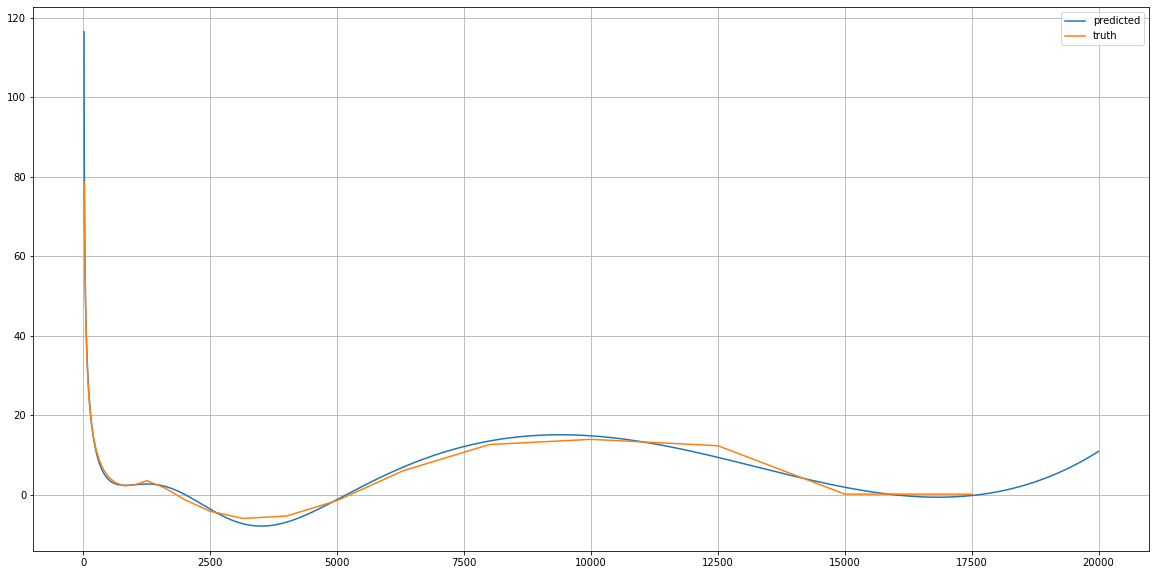

In [79]:
#@title Use scipy to find least_squares fits for each column of ISO 226 constants

def error(params, idx, pred):
  return (ISO_226_constant_table[:, idx] - pred(ISO_226_constant_table[:, 0], params)) / np.log(ISO_226_constant_table[:, 0])

def minimize(idx, pred, params):
  res = scipy.optimize.least_squares(functools.partial(error, idx=idx, pred=pred), np.ones((params,)))
  print(f'{res.x=}')
  x = np.linspace(10.0, 20000.0, 10000)
  _, ax = plt.subplots(figsize=(20, 10))
  ax.grid()
  ax.plot(x, pred(x, res.x), label='predicted')
  ax.plot(ISO_226_constant_table[:, 0], ISO_226_constant_table[:, idx], label='truth')
  plt.legend()
  plt.show()
  return res.x

def predict_a_f(x, params):
  """A combination of log, 2nd degre polynomial, and a single gaussian fits the a_f parameter."""
  return params[0] - params[1] * np.log(params[2] * (x-params[3])) + 0.04 * params[4] * np.exp(-(0.0000001*params[5]*(x-14000*params[6])**2)) - 0.03 * params[7] * np.exp(-(0.0000001*params[8]*(x-5000*params[9])**2))

a_f_params = minimize(1, predict_a_f, 10)

def predict_L_U(x, params):
  """A combination of log and 3 gaussians fits the L_U parameter."""
  return params[0] + params[1] * np.log(params[2] * (x - params[3])) - 5*params[4]* np.exp(-0.00001*params[5]*(x-1500*params[6])**2) + 5*params[7]* np.exp(-0.000001*params[8]*(x-3000*params[9])**2) - 15*params[10]*np.exp(-0.0000001*params[11]*(x-9000*params[12])**2) - 5*params[13]*np.exp(-0.00000001*params[14]*(x-12500*params[15])**2)

L_U_params = minimize(2, predict_L_U, 16)

def predict_T_f(x, params):
  """A combination of log, 3nd degre polynomial, and a single gaussian fits the T_f parameter."""
  return params[0] + params[1] * np.log(params[2] * (x - params[3])) + 5*params[4] * np.exp(-0.00001*params[5]*(x-1200*params[6])**2) - 10*params[7]*np.exp(-0.0000001*params[8]*(x-3300*params[9])**2) + 20*params[10]*np.exp(-0.00000001*params[11]*(x-12000*params[12])**2)

T_f_params = minimize(3, predict_T_f, 13)


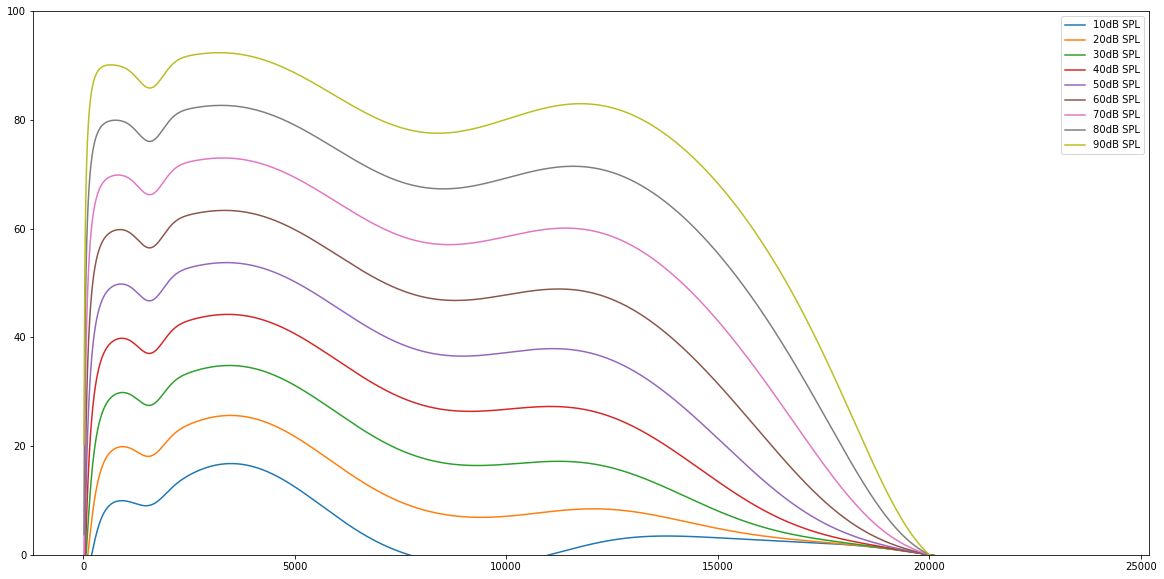

In [120]:
def phons_from_spl(spl, freq):
  a_f = predict_a_f(freq, a_f_params)
  L_U = predict_L_U(freq, L_U_params)
  T_f = predict_T_f(freq, T_f_params)

  def expf(x):
    return (0.4 * (10 ** ((x + L_U) / 10 - 9))) ** a_f

  B_f = expf(spl) - expf(T_f) + 0.005135
  return (40 * np.log10(B_f) + 94) * (
      1 - 2 / (1 + np.exp((20000 - freq) * 0.001))
  )


_, ax = plt.subplots(figsize=(20, 10))
freqs = np.arange(20, 24000)
for spl in range(10, 100, 10):
  ax.plot(freqs, phons_from_spl(spl, freqs), label=f'{spl}dB SPL')
ax.set_ylim((0, 100))
plt.legend()
plt.show()

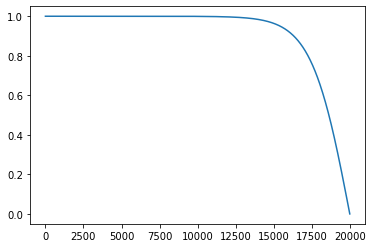

In [115]:
x = np.linspace(0, 20000, 1000)
plt.plot(x, 1-2/(1+np.exp((20000-x)*0.0008)))